<a href="https://colab.research.google.com/github/kikiru328/Bone_Detection/blob/main/Growth_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import pandas as pd
# test_F =pd.read_excel('/content/drive/MyDrive/Bone_detection/data/GUI_APR/2017_성장도표_데이터테이블_공개용_최종.xlsx')
# test_F = test_F.rename(columns={'만나이(세)':'AGE','만나이(개월)':'MONTH','성별':'GENDER'})
# male_F = test_F[test_F['GENDER'] == 1]
# female_F = test_F[test_F['GENDER'] == 2]


# Test_male_year = male_F[male_F['AGE'] >=3]
# Test_female_year = female_F[female_F['AGE'] >=3]

# male_year = Test_male_year.drop(['GENDER','L','M','S','-3SD','-2SD','-1SD',0,'+1SD','+2SD','+3SD'],axis=1)
# male_year = male_year.set_index('AGE')

# female_year = Test_female_year.drop(['GENDER','L','M','S','-3SD','-2SD','-1SD',0,'+1SD','+2SD','+3SD'],axis=1)
# female_year = female_year.set_index('AGE')

# male_SD = Test_male_year[['AGE','-3SD','-2SD','-1SD',0,'+1SD','+2SD','+3SD']]
# male_SD = male_SD.set_index('AGE')

# female_SD = Test_female_year[['AGE','-3SD','-2SD','-1SD',0,'+1SD','+2SD','+3SD']]
# female_SD = female_SD.set_index('AGE')

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
def Height_prediction ( gender, BA, current_H ) :
    import pandas as pd
    lms_df = pd.read_csv('/content/drive/MyDrive/Bone_detection/data/GUI_APR/height_df.csv')
    month_age = round(BA * 12)
    if gender == 1:
        lms_index = month_age - 36                                                             
        L_18, M_18, S_18 = lms_df.iloc[191,2], lms_df.iloc[191,3], lms_df.iloc[191,4]
    elif gender == 0:
        lms_index = month_age - 36
        L_18, M_18, S_18 = lms_df.iloc[383,2], lms_df.iloc[383,3], lms_df.iloc[383,4]

    L,M,S = lms_df.iloc[lms_index,2], lms_df.iloc[lms_index,3],lms_df.iloc[lms_index,4]
    x = current_H
    
    Z = (((x/M)**L)-1)/(L*S)
    Z = round(Z,4)

    pred_height = M_18 * (1 + (L_18 * S_18 * Z)) ** (1 / L_18)
    pred_height = round(pred_height, 1)
    return pred_height

In [4]:
def find_th(df,BA,Height):
    try:
        df = df.reset_index()
        find_df = df[(df['AGE'] == BA) & (df['MONTH'] == BA*12)] >= Height
        result_df = find_df.any()
        result_th = list(result_df[result_df==True].index)[0]
        return result_th
    except:
        print('Abnormal growth. Please check again')

In [8]:
def Height_graph(gender, Predict_BA, current_Height):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(10,15))

    if gender == 1:
        df = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 원본 데이터/growth/male_year.csv',index_col='AGE')
        sns.lineplot(data=df[['3rd','5th','10th','25th','50th','75th','90th','95th','97th']],palette='PuBu',dashes=False)
    elif gender == 0:
        df = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 원본 데이터/growth/female_year.csv',index_col='AGE')
        sns.lineplot(data=df[['3rd','5th','10th','25th','50th','75th','90th','95th','97th']],palette='Reds',dashes=False)
    

    result_th = find_th(df,Predict_BA,current_Height)
    Predict_Height = Height_prediction(gender,Predict_BA,current_Height)

    plt.xlabel('Age')
    plt.ylabel('Height')

    plt.axvline(Predict_BA,color='k',linestyle='--')
    plt.axhline(current_Height,color='k',linestyle='--')
    if result_th != None:
        plt.text(x=Predict_BA+2, y=current_Height-5, s=(f'  Current Height  \n [ {Predict_BA} Y, {current_Height} cm , {result_th} ]'), alpha=1, color='k',fontsize=15)
    elif result_th == None:
        plt.text(x=Predict_BA+2, y=current_Height-5, s=(f'  Current Height  \n [ {Predict_BA} Y, {current_Height} cm , Abnormal ]'), alpha=1, color='k',fontsize=15)

    plt.axvline(18,color='r',linestyle='--')
    plt.axhline(Predict_Height,color='r',linestyle='--')

    if gender ==1 :
        plt.text(x=13, y=Predict_Height+5, s=(f' Prediction Height  \n  [ 18 Y, {Predict_Height} cm ]'), alpha=1, color='r',fontsize=15)
    elif gender == 0 :
        plt.text(x=13, y=175, s=(f' Prediction Height  \n  [ 18 Y, {Predict_Height} cm ]'), alpha=1, color='r',fontsize=15)


    plt.legend(loc='upper left')
    plt.grid(linestyle='--',color='k',linewidth=0.5,)
    plt.xticks(ticks=range(3,19))
    plt.yticks(ticks=range(80,201,10))
    plt.title('3-18 Age Height')

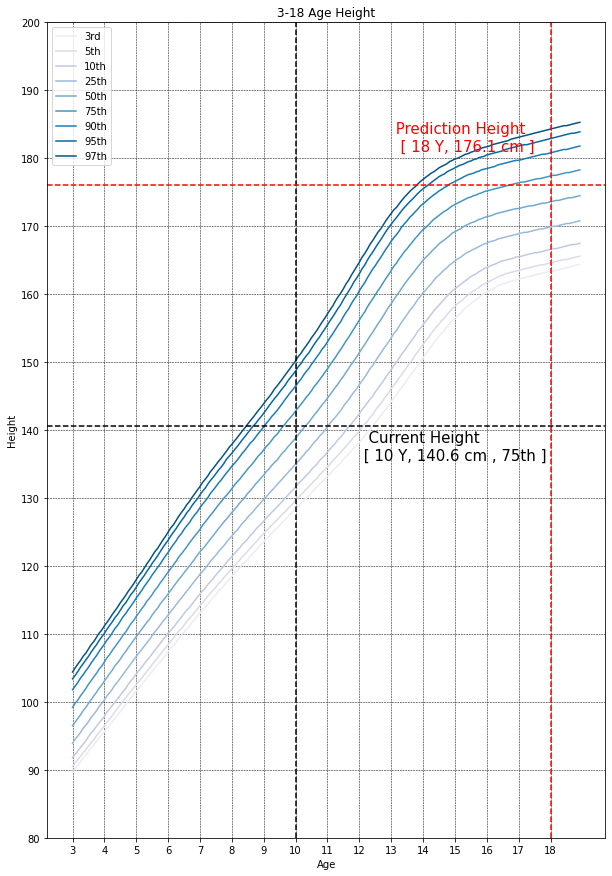

In [9]:
Height_graph(1,10,140.6)